In [3]:
import numpy as np
from numpy import genfromtxt

# Load data from the CSV file
data = genfromtxt('advertising.csv', delimiter=',', skip_header=1)

# Extract input (X) and output (y) data
N = data.shape[0]
X = data[:, :3]
y = data[:, 3:]

# Function to normalize input data using mean normalization
def mean_normalization(X):
    N = len(X)
    max_val = np.max(X)
    min_val = np.min(X)
    mean_val = np.mean(X)
    
    # Apply mean normalization
    X_normalized = (X - mean_val) / (max_val - min_val)
    
    # Add bias term (column of ones)
    X_b = np.c_[np.ones((N, 1)), X_normalized]
    
    return X_b, max_val, min_val, mean_val

# Perform mean normalization on input data
X_b, max_val, min_val, mean_val = mean_normalization(X)


In [6]:
thetas = np.asarray([[1.16270837], [-0.81960489], [1.39501033], [0.29763545]])
print(thetas.shape)

(4, 1)


In [7]:
print(X_b.shape)

(200, 4)


In [1]:
def stochastic_gradient_descent(X_b, y, n_epochs=50, learning_rate=0.00001):
    # Initialize theta values (comment/uncomment depending on the use case)
    # thetas = np.random.randn(4, 1)  # Use this in real applications
    thetas = np.asarray([[1.16270837], [-0.81960489], [1.39501033], [0.29763545]])

    thetas_path = [thetas]
    losses = []

    for epoch in range(n_epochs):
        for i in range(N):
            # Select a random index (uncomment for real applications)
            # random_index = np.random.randint(N)
            random_index = i  # Used for this assignment only

            # Extract sample input and output
            xi = X_b[random_index:random_index + 1]
            yi = y[random_index:random_index + 1]

            # Your code here: Compute output
            yi_hat = xi.dot(thetas)

            loss = (1 / 2) * (yi_hat - yi) ** 2 # Convert array to scalar
            losses.append(loss[0][0])

            gradient = xi.T.dot(yi_hat - yi)
            # Update theta
            thetas = thetas - learning_rate * gradient
            # Logging
            thetas_path.append(thetas.copy())


    return thetas_path, losses


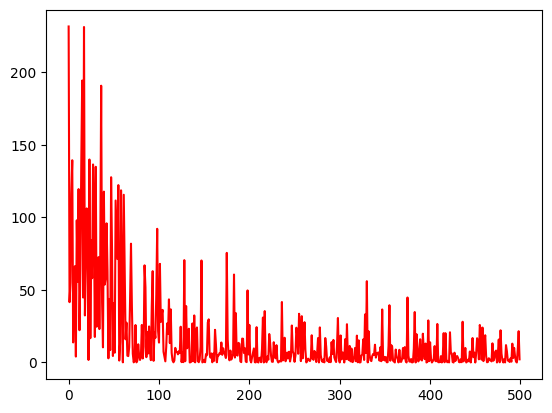

In [4]:
import matplotlib.pyplot as plt

# Run stochastic gradient descent
sgd_theta, losses = stochastic_gradient_descent(X_b, y, n_epochs=500, learning_rate=0.01)

# Plot the losses for the first 500 iterations
x_axis = list(range(500))
plt.plot(x_axis, losses[:500], color="r")
plt.show()

In [5]:
sgd_theta, losses = stochastic_gradient_descent(X_b, y, n_epochs=1, learning_rate=0.01)
print(np.sum(losses))

6754.643359356192
